In [52]:
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv("dirty_iris.csv")

In [54]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [55]:
obser=len(df.dropna())

In [56]:
tot_obser=len(df)

In [57]:
obser

96

In [58]:
tot_obser

150

In [59]:
per=(obser/tot_obser)*100

In [60]:
per

64.0

In [61]:
df1=df.replace([np.nan,np.inf],"NA")

In [62]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NA,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [63]:
df['Rule1']=df['Species'].apply(lambda x: x=="setosa" or x=="versicolor" or x=="virginica")

In [64]:
df['Rule2']=(df["Sepal.Length"]>0) & (df["Sepal.Width"]>0) & (df["Petal.Length"]>0) & (df["Petal.Width"]>0)

In [65]:
df['Rule3']=df['Petal.Length']>=(2*df['Petal.Width'])

In [66]:
df['Rule4']=df['Sepal.Length']<=30

In [67]:
df['Rule5']=df['Sepal.Length']>df['Petal.Length']

In [68]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Rule1,Rule2,Rule3,Rule4,Rule5
0,6.4,3.2,4.5,1.5,versicolor,True,True,True,True,True
1,6.3,3.3,6.0,2.5,virginica,True,True,True,True,True
2,6.2,NaN,5.4,2.3,virginica,True,False,True,True,True
3,5.0,3.4,1.6,0.4,setosa,True,True,True,True,True
4,5.7,2.6,3.5,1.0,versicolor,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica,True,True,True,True,True
146,5.6,3.0,4.5,1.5,versicolor,True,True,True,True,True
147,5.2,3.5,1.5,0.2,setosa,True,True,True,True,True
148,6.4,3.1,NaN,1.8,virginica,True,False,False,True,False


In [69]:
df_violated=~df[['Rule1','Rule2','Rule3','Rule4','Rule5']]

In [70]:
df_violated.head()

,Rule1,Rule2,Rule3,Rule4,Rule5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [71]:
df_violated=df_violated.astype('int')

In [72]:
df_violated.describe()

,Rule1,Rule2,Rule3,Rule4,Rule5
count,150.0,150.000000,150.000000,150.000000,150.00000
mean,0.0,0.380000,0.226667,0.080000,0.20000
std,0.0,0.487013,0.420078,0.272202,0.40134
min,0.0,0.000000,0.000000,0.000000,0.00000
25%,0.0,0.000000,0.000000,0.000000,0.00000
50%,0.0,0.000000,0.000000,0.000000,0.00000
75%,0.0,1.000000,0.000000,0.000000,0.00000
max,0.0,1.000000,1.000000,1.000000,1.00000


In [73]:
import matplotlib.pyplot as plt

In [74]:
result=df_violated.sum()

In [75]:
result

Rule1     0
Rule2    57
Rule3    34
Rule4    12
Rule5    30
dtype: int64

<BarContainer object of 5 artists>

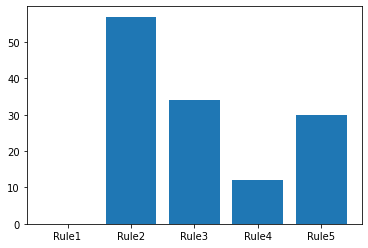

In [76]:
plt.bar(df_violated.columns,result)

In [77]:
df.replace([np.nan,np.inf],0,inplace=True)

In [78]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Rule1,Rule2,Rule3,Rule4,Rule5
0,6.4,3.2,4.5,1.5,versicolor,True,True,True,True,True
1,6.3,3.3,6.0,2.5,virginica,True,True,True,True,True
2,6.2,0.0,5.4,2.3,virginica,True,False,True,True,True
3,5.0,3.4,1.6,0.4,setosa,True,True,True,True,True
4,5.7,2.6,3.5,1.0,versicolor,True,True,True,True,True


{'whiskers': [<matplotlib.lines.Line2D at 0x177ea02e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x177ea02e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x177ea011b50>,
 'medians': [<matplotlib.lines.Line2D at 0x177ea02ed60>,
 'fliers': [<matplotlib.lines.Line2D at 0x177ea031370>,
 'means': []}

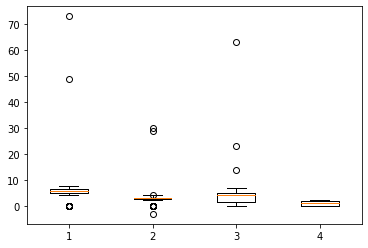

In [79]:
plt.boxplot(df[df.columns[:4]])

In [80]:
t=(df)[df.columns[:4]].describe()

In [81]:
t

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,6.122000,3.006667,3.886300,1.102667
std,6.770791,3.301589,5.589785,0.806180
min,0.000000,-3.000000,0.000000,0.000000
25%,5.000000,2.700000,1.400000,0.200000
50%,5.700000,3.000000,4.100000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,73.000000,30.000000,63.000000,2.500000


In [82]:
iqr = (1.5*(t["Sepal.Length"]["75%"]-t["Sepal.Length"]["25%"]))
q1=t["Sepal.Length"]["75%"]+iqr
q2=t["Sepal.Length"]["25%"]-iqr


In [83]:
print("Sepal.Length",df[(df['Sepal.Length']>q1)]["Sepal.Length"])

Sepal.Length 27     73.0
124    49.0
Name: Sepal.Length, dtype: float64


In [84]:
print("Sepal.Length",df[(df['Sepal.Length']<q2)]["Sepal.Length"])

Sepal.Length 14     0.0
18     0.0
24     0.0
29     0.0
42     0.0
57     0.0
67     0.0
113    0.0
118    0.0
119    0.0
137    0.0
Name: Sepal.Length, dtype: float64


In [86]:
q1

8.5

In [87]:
q2

2.8999999999999995